# Credit card user segmentation 

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

## The Data
The data consists of a csv file with 8950 rows (one for each cardholder) organized in columns with descriptive headers.

In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv('cc_info.csv') 
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.shape

(8950, 18)

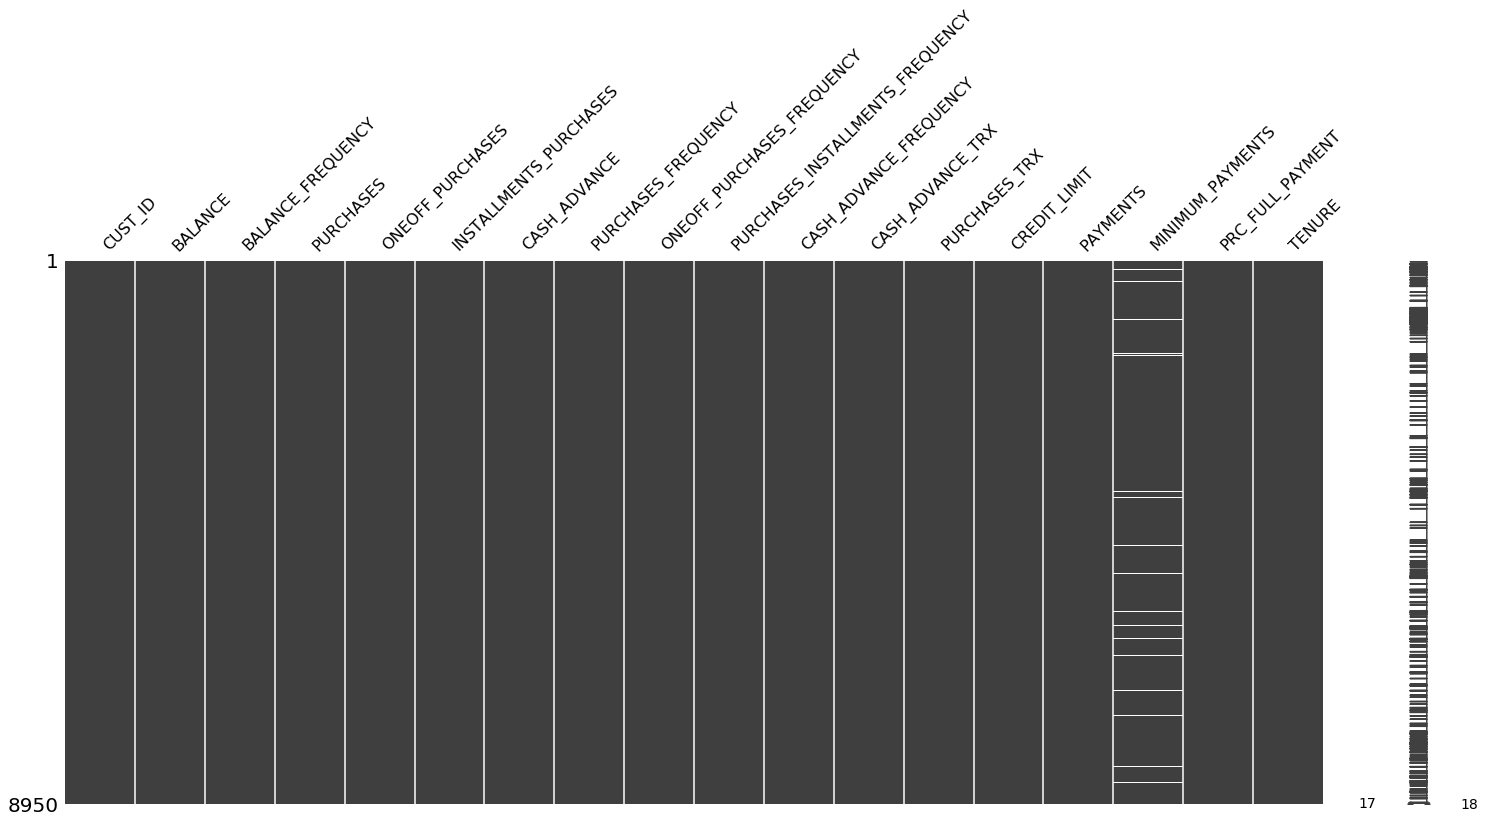

In [3]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [4]:
df.dropna(inplace=True)
df.shape

(8636, 18)

In [5]:
df = df.iloc[:,1:]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [6]:
from sklearn.preprocessing import StandardScaler

dfx = StandardScaler().fit_transform(df)
dfx = pd.DataFrame(dfx)
dfx.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
5,-0.464799,0.505405,2.799089,3.442402,0.291691,-0.468655,1.256077,2.646651,1.585600,-0.681953,-0.479437,1.944745,2.453632,1.570584,-0.280826,2.837758,0.355181
6,0.106148,0.505405,-0.271914,-0.359160,0.016743,-0.468655,1.256077,-0.686280,1.585600,-0.681953,-0.479437,-0.120467,-0.607290,-0.379914,-0.140055,-0.537727,0.355181
7,-0.279796,0.505405,-0.075655,0.033599,-0.240782,-0.468655,-0.405401,-0.408536,-0.298491,-0.681953,-0.479437,-0.398476,0.677204,-0.376747,-0.232817,-0.537727,0.355181
8,-0.691498,-1.683224,0.118213,0.401790,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.477907,1.770390,-0.212984,-0.322034,-0.537727,0.355181
9,-0.147033,0.505405,-0.048599,-0.359160,0.544353,-0.468655,1.256077,-0.686280,1.585600,-0.681953,-0.479437,-0.120467,-0.907916,-0.240984,0.551499,-0.537727,0.355181


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfx)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.696395,-1.122583
1,-1.215686,2.435632
2,0.935857,-0.385215
3,-1.614637,-0.724583
4,0.223703,-0.783620
5,6.265593,-0.609437
6,0.261669,-1.295639
7,-0.465340,-0.477691
8,-0.599684,-0.408583
9,0.522773,-1.312171


In [16]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=4)
kmeans_1.fit(dfx)
cluster_pred=kmeans_1.predict(dfx)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

print("done")

done


In [17]:
for i in range(len(set(cluster_pred))):
    print(df[cluster_pred==i].shape)



(3281, 17)
(394, 17)
(3805, 17)
(1156, 17)


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
print("done")

done


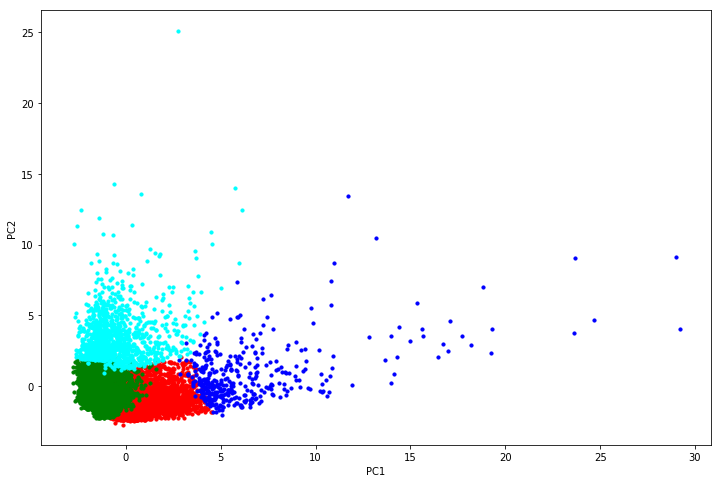

In [18]:

plt.figure(figsize=(12,8))
plt.scatter(principalDf[cluster_pred==0].iloc[:,0],principalDf[cluster_pred==0].iloc[:,1], s = 10, c = 'red', label ='cluster 1' )
plt.scatter(principalDf[cluster_pred==1].iloc[:,0],principalDf[cluster_pred==1].iloc[:,1], s = 10, c = 'blue', label ='cluster 2' )
plt.scatter(principalDf[cluster_pred==2].iloc[:,0],principalDf[cluster_pred==2].iloc[:,1], s = 10, c = 'green', label ='cluster 3' )
plt.scatter(principalDf[cluster_pred==3].iloc[:,0],principalDf[cluster_pred==3].iloc[:,1], s = 10, c = 'cyan', label = 'cluster 4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [19]:
pca.explained_variance_ratio_

array([0.27231177, 0.20374308])

In [20]:
print(pca.components_)

[[ 0.09198605  0.10981214  0.41215123  0.34677534  0.33705567 -0.03058776
   0.32366492  0.29476139  0.27722625 -0.0991455  -0.05696023  0.39106642
   0.21005176  0.26372553  0.05932628  0.13056504  0.07791867]
 [ 0.40597828  0.127739    0.04952996  0.0699295  -0.01148184  0.43724657
  -0.18658204 -0.01474693 -0.17357689  0.4299967   0.41641205 -0.01194562
   0.24382348  0.26418218  0.17041586 -0.19570894 -0.00456575]]


In [21]:
df[cluster_pred==0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,913.099184,0.946169,1264.675431,611.072630,653.884203,218.409256,0.887404,0.302467,0.713691,0.043817,0.815910,22.511429,4254.075054,1373.189779,649.316887,0.274334,11.601036
std,1222.214165,0.131602,1057.059113,885.648887,633.774653,619.412430,0.148702,0.353961,0.313159,0.101191,2.070908,16.322865,3291.496055,1295.107887,1794.713210,0.358929,1.236976
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,16.385421,0.261984,0.000000,6.000000
25%,87.026009,1.000000,450.670000,0.000000,228.000000,0.000000,0.818182,0.000000,0.555556,0.000000,0.000000,12.000000,1500.000000,477.773934,161.430668,0.000000,12.000000
50%,352.587990,1.000000,922.740000,186.050000,458.500000,0.000000,1.000000,0.166667,0.833333,0.000000,0.000000,17.000000,3000.000000,977.188809,195.433258,0.083333,12.000000
75%,1279.325142,1.000000,1819.000000,929.670000,888.880000,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1828.965302,567.942336,0.500000,12.000000
max,9502.256762,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000


In [24]:
pd.options.display.float_format = '{:,.2f}'.format

In [25]:
df[cluster_pred==0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,"3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00","3,281.00"
mean,913.10,0.95,"1,264.68",611.07,653.88,218.41,0.89,0.30,0.71,0.04,0.82,22.51,"4,254.08","1,373.19",649.32,0.27,11.60
std,"1,222.21",0.13,"1,057.06",885.65,633.77,619.41,0.15,0.35,0.31,0.10,2.07,16.32,"3,291.50","1,295.11","1,794.71",0.36,1.24
min,0.00,0.00,8.40,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,300.00,16.39,0.26,0.00,6.00
25%,87.03,1.00,450.67,0.00,228.00,0.00,0.82,0.00,0.56,0.00,0.00,12.00,"1,500.00",477.77,161.43,0.00,12.00
50%,352.59,1.00,922.74,186.05,458.50,0.00,1.00,0.17,0.83,0.00,0.00,17.00,"3,000.00",977.19,195.43,0.08,12.00
75%,"1,279.33",1.00,"1,819.00",929.67,888.88,0.00,1.00,0.58,1.00,0.00,0.00,28.00,"6,000.00","1,828.97",567.94,0.50,12.00
max,"9,502.26",1.00,"6,520.00","6,520.00","4,538.84","7,894.58",1.00,1.00,1.00,0.75,23.00,186.00,"25,000.00","12,020.18","38,512.12",1.00,12.00


In [31]:
df[cluster_pred==0].describe().iloc[1,:]

BALANCE                              913.10
BALANCE_FREQUENCY                      0.95
PURCHASES                          1,264.68
ONEOFF_PURCHASES                     611.07
INSTALLMENTS_PURCHASES               653.88
CASH_ADVANCE                         218.41
PURCHASES_FREQUENCY                    0.89
ONEOFF_PURCHASES_FREQUENCY             0.30
PURCHASES_INSTALLMENTS_FREQUENCY       0.71
CASH_ADVANCE_FREQUENCY                 0.04
CASH_ADVANCE_TRX                       0.82
PURCHASES_TRX                         22.51
CREDIT_LIMIT                       4,254.08
PAYMENTS                           1,373.19
MINIMUM_PAYMENTS                     649.32
PRC_FULL_PAYMENT                       0.27
TENURE                                11.60
Name: mean, dtype: float64

In [32]:
df[cluster_pred==1].describe().iloc[1,:]

BALANCE                            3,586.15
BALANCE_FREQUENCY                      0.99
PURCHASES                          7,816.07
ONEOFF_PURCHASES                   5,194.56
INSTALLMENTS_PURCHASES             2,623.03
CASH_ADVANCE                         658.23
PURCHASES_FREQUENCY                    0.94
ONEOFF_PURCHASES_FREQUENCY             0.74
PURCHASES_INSTALLMENTS_FREQUENCY       0.79
CASH_ADVANCE_FREQUENCY                 0.07
CASH_ADVANCE_TRX                       2.10
PURCHASES_TRX                         90.35
CREDIT_LIMIT                       9,775.38
PAYMENTS                           7,454.04
MINIMUM_PAYMENTS                   2,016.14
PRC_FULL_PAYMENT                       0.29
TENURE                                11.95
Name: mean, dtype: float64

In [33]:
df[cluster_pred==2].describe().iloc[1,:]

BALANCE                            1,061.25
BALANCE_FREQUENCY                      0.82
PURCHASES                            273.94
ONEOFF_PURCHASES                     210.94
INSTALLMENTS_PURCHASES                63.28
CASH_ADVANCE                         606.66
PURCHASES_FREQUENCY                    0.17
ONEOFF_PURCHASES_FREQUENCY             0.09
PURCHASES_INSTALLMENTS_FREQUENCY       0.08
CASH_ADVANCE_FREQUENCY                 0.12
CASH_ADVANCE_TRX                       2.21
PURCHASES_TRX                          3.00
CREDIT_LIMIT                       3,259.16
PAYMENTS                           1,013.58
MINIMUM_PAYMENTS                     573.84
PRC_FULL_PAYMENT                       0.08
TENURE                                11.48
Name: mean, dtype: float64

In [34]:
df[cluster_pred==3].describe().iloc[1,:]

BALANCE                            4,655.12
BALANCE_FREQUENCY                      0.97
PURCHASES                            505.50
ONEOFF_PURCHASES                     319.81
INSTALLMENTS_PURCHASES               185.77
CASH_ADVANCE                       4,586.00
PURCHASES_FREQUENCY                    0.29
ONEOFF_PURCHASES_FREQUENCY             0.14
PURCHASES_INSTALLMENTS_FREQUENCY       0.19
CASH_ADVANCE_FREQUENCY                 0.49
CASH_ADVANCE_TRX                      14.45
PURCHASES_TRX                          7.75
CREDIT_LIMIT                       7,649.27
PAYMENTS                           3,556.90
MINIMUM_PAYMENTS                   2,037.98
PRC_FULL_PAYMENT                       0.04
TENURE                                11.39
Name: mean, dtype: float64

In [37]:
kmeans_1.labels_

array([2, 3, 0, ..., 0, 2, 2])

In [44]:
print(pca.components_)
df.columns.values

[[ 0.09198605  0.10981214  0.41215123  0.34677534  0.33705567 -0.03058776
   0.32366492  0.29476139  0.27722625 -0.0991455  -0.05696023  0.39106642
   0.21005176  0.26372553  0.05932628  0.13056504  0.07791867]
 [ 0.40597828  0.127739    0.04952996  0.0699295  -0.01148184  0.43724657
  -0.18658204 -0.01474693 -0.17357689  0.4299967   0.41641205 -0.01194562
   0.24382348  0.26418218  0.17041586 -0.19570894 -0.00456575]]


array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

In [45]:
df["MINIMUM_PAYMENTS"].describe()

count    8,636.00
mean       864.30
std      2,372.57
min          0.02
25%        169.16
50%        312.45
75%        825.50
max     76,406.21
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
# use scipy and sklearn to draw dendrogram and seperate groups
# data not imported just for record

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  


# agglomerative approach
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 


plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')


### https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/